#  Local interpretability

[Machine Learning Interpretability course](https://www.trainindata.com/p/machine-learning-interpretability)

In this notebook, we will evaluate the contribution of each feature towards the target value, for a single observation.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load data

To obtain the data, check the folder `prepare-data` in this repo, or section 2 in the course.

In [2]:
# load titanic dataset

df = pd.read_csv('../titanic.csv')

# Split the data

X_train, X_test, y_train, y_test = train_test_split(
    df.drop("survived", axis=1),
    df["survived"],
    test_size=0.15,
    random_state=1,
)

# scale the variables
scaler = StandardScaler().set_output(transform="pandas")

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# We know from previous notebooks that these features are non-
# predictive (their coefficients are not significantly 
# different from 0.)

non_predictive = ["parch", "embarked_S", "embarked_C", "cabin_C",
                  "cabin_B", "cabin_E", "cabin_D", "cabin_A", "cabin_G"]

# So we take them out
X_train.drop(non_predictive, axis=1, inplace=True)
X_test.drop(non_predictive, axis=1, inplace=True)

## Logistic regression

In [4]:
# fit model

# important to remove the penalty for unregularized regression.
logit = LogisticRegression(penalty=None, random_state=1)

logit.fit(X_train, y_train)

LogisticRegression(penalty=None, random_state=1)

In [5]:
coeffs = pd.Series(logit.coef_[0], index=logit.feature_names_in_)
coeffs

pclass       -0.496738
sibsp        -0.225361
sex_female    1.181004
cabin_M      -0.330048
dtype: float64

## Local interpretability

Let's take an individual observation and evaluate how its feature values contribute towards survival.

In [6]:
# Let's pick up a few observations

X_test.tail()

,pclass,sibsp,sex_female,cabin_M
401,-0.367425,0.469050,1.352596,0.539927
893,0.834271,-0.474139,-0.739319,0.539927
90,-1.569122,0.469050,1.352596,-1.852101
593,-0.367425,0.469050,1.352596,0.539927
866,0.834271,-0.474139,1.352596,0.539927


In [7]:
obs = 401

X_test.loc[obs]

pclass       -0.367425
sibsp         0.469050
sex_female    1.352596
cabin_M       0.539927
Name: 401, dtype: float64

In [8]:
X_train["pclass"].unique()

array([ 0.83427143, -0.36742524, -1.56912191])

Female, second class. We do not know in which cabin she was traveling (M is for missing).

In [9]:
# predict survival

logit.predict_proba(X_test.loc[obs].to_frame().T)

array([[0.29929188, 0.70070812]])

Good changes of survival.

In [10]:
# did she survive?

y_test.loc[obs]

1

This person survived. Model agrees with outcome.

In [11]:
# log(Odds) contribution of each feature

effect = coeffs * X_test.loc[obs]

effect

pclass        0.182514
sibsp        -0.105706
sex_female    1.597422
cabin_M      -0.178202
dtype: float64

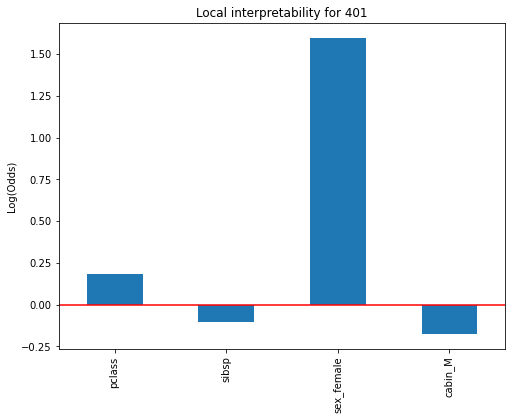

In [12]:
effect.plot.bar(figsize=(8,6))

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Log(Odds)")
plt.title(f"Local interpretability for {obs}")
plt.show()

What do we make of this plot?

- She was female, that increased her chances of survival.
- Being in second class also seemed to increase her chance of survival
- We don't have data about where she was traveling and she probably had a husband or a child, which in this data, makes her less likely to survive.

**Let's try someone else:**

In [13]:
obs = 90

X_test.loc[obs]

pclass       -1.569122
sibsp         0.469050
sex_female    1.352596
cabin_M      -1.852101
Name: 90, dtype: float64

Female, first class. Her cabin information was not missing. So we know where she was traveling.

In [14]:
# probability of survival

logit.predict_proba(X_test.loc[obs].to_frame().T)

array([[0.09646946, 0.90353054]])

High probability of survival.

In [15]:
# did she survive?

y_test.loc[obs]

1

This person also survived.

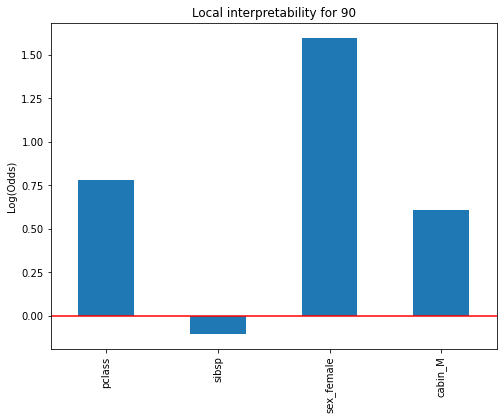

In [16]:
# log(Odds) contribution of each feature
effect = coeffs * X_test.loc[obs]

effect.plot.bar(figsize=(8,6))

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Log(Odds)")
plt.title(f"Local interpretability for {obs}")
plt.show()

What to make of this?

This passenger was among the most likely to survive based on our model:

- She was female
- She was rich (traveled first class)
- We know in which cabin she was traveling (not missing data)

**Let's try one more passenger:**

In [17]:
obs = 893

X_test.loc[obs]

pclass        0.834271
sibsp        -0.474139
sex_female   -0.739319
cabin_M       0.539927
Name: 893, dtype: float64

Male, third class. We don't know in which cabin he was traveling. I can tell you know, it does not look great for him.

In [18]:
# obtain prediction of survival

logit.predict_proba(X_test.loc[obs].to_frame().T)

array([[0.88124343, 0.11875657]])

Poor chance of survival.

In [19]:
# did he survive?

y_test.loc[obs]

0

Indeed, this person did not survive.

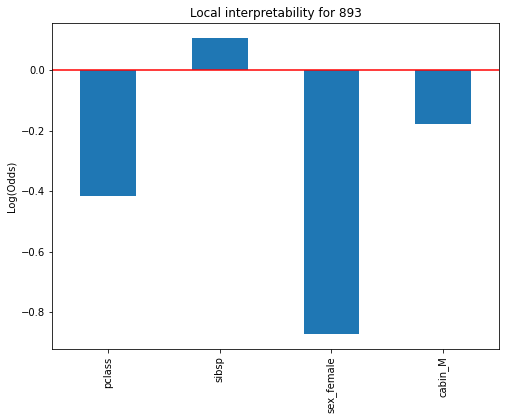

In [20]:
# log(Odds) contribution of each feature

effect = coeffs * X_test.loc[obs]

effect.plot.bar(figsize=(8,6))

plt.axhline(y=0, color='r', linestyle='-')
plt.ylabel("Log(Odds)")
plt.title(f"Local interpretability for {obs}")
plt.show()

As expected, because he was male and poor, his chances of survival were little. The plot shows that these 2 variables decrease his probability of survival.